In [1]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 137kB/s 
     |████████████████████████████████| 6.8MB 51.3MB/s 
     |████████████████████████████████| 983kB 53.6MB/s 
     |████████████████████████████████| 266kB 51.2MB/s 
     |████████████████████████████████| 1.3MB 47.0MB/s 
     |████████████████████████████████| 1.2MB 41.3MB/s 
     |████████████████████████████████| 471kB 46.9MB/s 
     |████████████████████████████████| 2.9MB 44.3MB/s 
     |████████████████████████████████| 890kB 50.1MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.3-cp36-none-any.whl size=25276312 sha256=f6550570ad0f114caecf8b239fbfeb4b34050328d7af50b921cf130df1073b2c
  Stored in directory: /root/.cache/pip/wheels/86/cd/9c/ad53b98a3eccf4ddeddccfce99d353781f206a1ac4287ca721
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=60ccb1d83eb655d0fbd7cc7a3ea7be3ae774597383fced194c90f803bed7d77a
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [2]:
import ktrain
from ktrain import text
import pandas as pd
import numpy as np
from sklearn.utils import shuffle, resample

## Load the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
news = pd.read_excel("/content/drive/MyDrive/Uni_Köln/Masterarbeit/Crawler/data/FinalDataset/CleanData_FinalDataset_ForModel_V5.xlsx", index_col=0)

In [6]:
# Get the same train and test data
def split_df_in_train_test(df):
    df = df.reset_index()
    split_point = int(np.round(df.shape[0]) * 0.8)
    df_train = df.loc[:split_point-1,:]
    df_test = df.loc[split_point:,:]
    return df_train, df_test

In [7]:
n_samples = 6000

In [8]:
left_FE = resample(shuffle(news[(news["label"]=="links") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)
leanLeft_FE = resample(shuffle(news[(news["label"]=="halbLinks") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)
center_FE = resample(shuffle(news[(news["label"]=="central") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)
leanRight_FE = resample(shuffle(news[(news["label"]=="halbRechts") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)
right_FE = resample(shuffle(news[(news["label"]=="rechts") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)

In [9]:
train = pd.concat([split_df_in_train_test(left_FE)[0], \
    split_df_in_train_test(leanLeft_FE)[0], \
    split_df_in_train_test(center_FE)[0], \
    split_df_in_train_test(leanRight_FE)[0], \
    split_df_in_train_test(right_FE)[0]])

In [10]:
test =  pd.concat([split_df_in_train_test(left_FE)[1], \
    split_df_in_train_test(leanLeft_FE)[1], \
    split_df_in_train_test(center_FE)[1], \
    split_df_in_train_test(leanRight_FE)[1], \
    split_df_in_train_test(right_FE)[1]])

In [11]:
x_train = train["maintext"].to_list()
y_train = train["label"].to_list()
x_test = test["maintext"].to_list()
y_test = test["label"].to_list()

In [12]:
class_names = list(train["label"].unique())

## Build the model

In [13]:
model_name = "distilbert-base-german-cased"

In [14]:
t = text.Transformer(model_name, maxlen=512, classes= class_names)

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:414: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


In [15]:
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)

preprocessing train...
language: de
train sequence lengths:
	mean : 223
	95percentile : 470
	99percentile : 503


/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:589: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: de
test sequence lengths:
	mean : 223
	95percentile : 471
	99percentile : 503


In [16]:
trn.x

array([[[ 102, 2478, 5230, ..., 1035,  704,  103],
        [   1,    1,    1, ...,    1,    1,    1],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[ 102,  259,  893, ...,  566,  505,  103],
        [   1,    1,    1, ...,    1,    1,    1],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[ 102, 2608,  232, ...,    0,    0,    0],
        [   1,    1,    1, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       ...,

       [[ 102,  351, 9607, ...,    0,    0,    0],
        [   1,    1,    1, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[ 102,  478, 7375, ...,    0,    0,    0],
        [   1,    1,    1, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[ 102, 2682, 4621, ...,    0,    0,    0],
        [   1,    1,    1, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]]])

In [17]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

404 Client Error: Not Found for url: https://huggingface.co/distilbert-base-german-cased/resolve/main/tf_model.h5


In [18]:
model.loss

In [19]:
learner.freeze()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
3000/3000 [==============================] - 343s 111ms/step - loss: 4.7702 - accuracy: 0.2385


done.
Visually inspect loss plot and select learning rate associated with falling loss


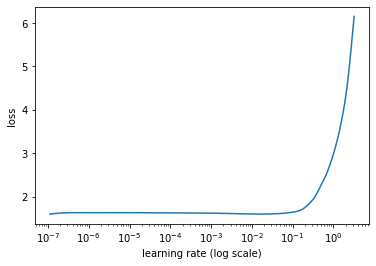

In [20]:
learner.lr_find(show_plot=True)

In [21]:
optimal_lr = learner.lr_estimate()[1]

In [22]:
print(optimal_lr)

1.0000000116860974e-08


In [23]:
learner.fit(0.0001, 10)

Epoch 1/10
3000/3000 [==============================] - 1665s 551ms/step - loss: 1.0187 - accuracy: 0.5987 - val_loss: 0.6169 - val_accuracy: 0.7852
Epoch 2/10
3000/3000 [==============================] - 1656s 551ms/step - loss: 0.4304 - accuracy: 0.8539 - val_loss: 0.4696 - val_accuracy: 0.8582
Epoch 3/10
3000/3000 [==============================] - 1655s 550ms/step - loss: 0.2366 - accuracy: 0.9230 - val_loss: 0.4720 - val_accuracy: 0.8647
Epoch 4/10
3000/3000 [==============================] - 1655s 550ms/step - loss: 0.1407 - accuracy: 0.9550 - val_loss: 0.5738 - val_accuracy: 0.8685
Epoch 5/10
3000/3000 [==============================] - 1652s 549ms/step - loss: 0.1074 - accuracy: 0.9676 - val_loss: 0.5112 - val_accuracy: 0.8760
Epoch 6/10
3000/3000 [==============================] - 1652s 549ms/step - loss: 0.0686 - accuracy: 0.9815 - val_loss: 0.6986 - val_accuracy: 0.8623
Epoch 7/10
3000/3000 [==============================] - 1650s 549ms/step - loss: 0.0748 - accuracy: 0.9778

In [24]:
learner.validate(class_names=class_names)

              precision    recall  f1-score   support

       links       0.81      0.81      0.81      1200
   halbLinks       0.78      0.93      0.84      1200
     central       0.87      0.72      0.79      1200
  halbRechts       0.94      0.90      0.92      1200
      rechts       0.86      0.87      0.86      1200

    accuracy                           0.85      6000
   macro avg       0.85      0.85      0.84      6000
weighted avg       0.85      0.85      0.84      6000



array([[ 976,  117,   59,   25,   23],
       [  21, 1110,    9,   10,   50],
       [ 132,  106,  866,   22,   74],
       [  32,   37,   23, 1080,   28],
       [  46,   60,   44,   10, 1040]])